<a href="https://colab.research.google.com/github/dkm4/Fully-connected-neural-network-project/blob/main/Fully_connected_Neural_Network_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change the runtime to use GPU

# imports

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


# Find the device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


# Build my X values

In [ ]:
X = torch.arange(0, 1, 0.02).to(device)
print(X.shape)
X = X.unsqueeze(dim=1)
print(X.shape)
print(X.device)

torch.Size([50])
torch.Size([50, 1])
cuda:0


# Build my Y values

In [ ]:
slope = -9.0
intercept = -5.0
y = slope*X+intercept
print(y.shape)
print(y.device)

torch.Size([50, 1])
cuda:0


In [ ]:
print(f"Input Shape {X.shape} and output shape {y.shape}")
print(f"type of X is {type(X)} and type of y is {type(y)}")
print(len(X))
print(len(y))

Input Shape torch.Size([50, 1]) and output shape torch.Size([50, 1])
type of X is <class 'torch.Tensor'> and type of y is <class 'torch.Tensor'>
50
50


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

40 10 40 10


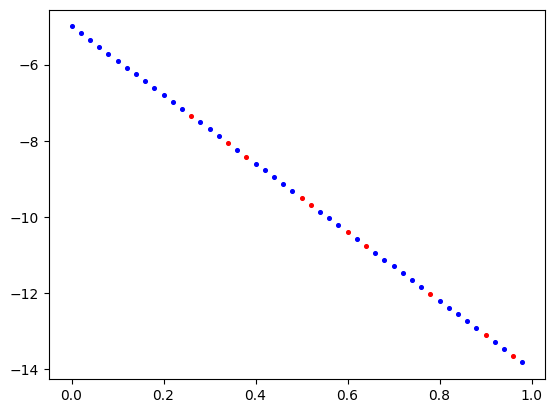

In [ ]:
plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=7, label="Training Data")
plt.scatter(X_test.cpu(), y_test.cpu(), c="r", s=7, label="Test Data")

In [ ]:
def plot_dataset(train_data, test_data, train_labels, test_labels, predictions=None):
  plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=7, label="Training Data")
  plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=7, label="Test Data")
  if predictions is not None:
    plt.scatter(test_data.cpu(), predictions.cpu(), c="r", s=7, label="Predictions")
  plt.legend(prop={"size":10})

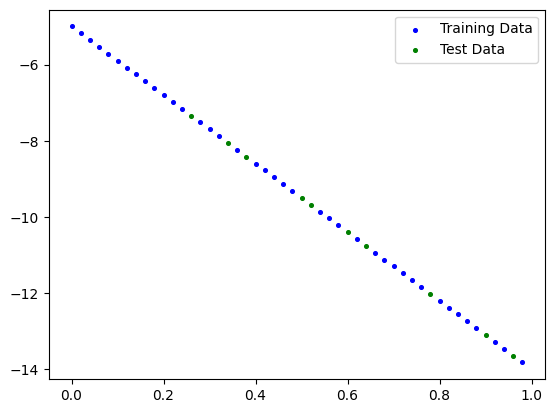

In [ ]:
plot_dataset(X_train, X_test, y_train, y_test)

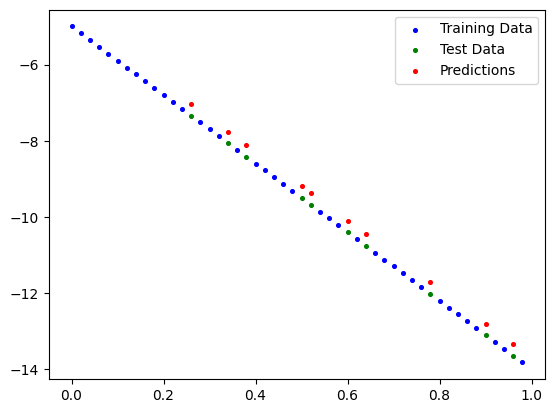

In [ ]:
plot_dataset(X_train, X_test, y_train, y_test, y_test+0.3)

In [ ]:
class NeuralNetworkFC(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

In [ ]:
my_model = NeuralNetworkFC().to(device)
print(f"Model parameters {my_model.state_dict()}")
print(f"Model parameters {list(my_model.parameters())}")
print(f"Device of my parameters: {next(my_model.parameters()).device}")

Model parameters OrderedDict([('linear_layer.weight', tensor([[0.6283]], device='cuda:0')), ('linear_layer.bias', tensor([0.9044], device='cuda:0'))])
Model parameters [Parameter containing:
tensor([[0.6283]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.9044], device='cuda:0', requires_grad=True)]
Device of my parameters: cuda:0


In [ ]:
my_model.eval()
with torch.no_grad():
  y_preds = my_model(X_test)
print(X_test)
print(f"X test shape is {X_test.shape}")
print(y_preds)
print(f"y preds shape is {y_preds.shape}")


tensor([[0.2600],
        [0.7800],
        [0.6000],
        [0.9000],
        [0.3400],
        [0.9600],
        [0.5200],
        [0.5000],
        [0.6400],
        [0.3800]], device='cuda:0')
X test shape is torch.Size([10, 1])
tensor([[1.0678],
        [1.3945],
        [1.2814],
        [1.4699],
        [1.1180],
        [1.5075],
        [1.2311],
        [1.2185],
        [1.3065],
        [1.1431]], device='cuda:0')
y preds shape is torch.Size([10, 1])


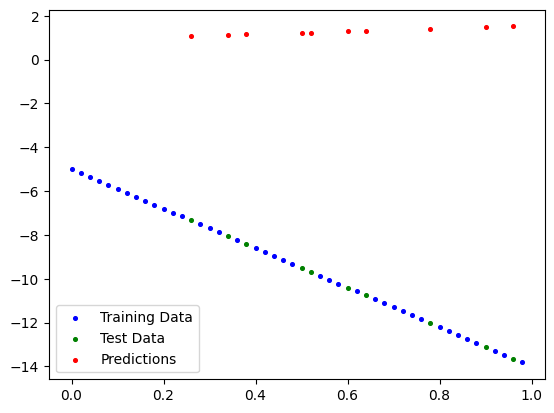

In [ ]:
plot_dataset(X_train, X_test, y_train, y_test, y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = my_model.parameters(), lr=0.001)

In [ ]:
epochs = 50000
for epoch in range(epochs):
  my_model.train()

  y_preds = my_model(X_train)
  training_loss = loss_fn(y_preds, y_train)

  #make all the previous gradients to zero
  optimizer.zero_grad()
  #compute the gradients
  training_loss.backward()
  #take an optimization step
  optimizer.step()

  my_model.eval()
  with torch.no_grad():
    test_predictions = my_model(X_test)
    test_loss = loss_fn(test_predictions, y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Training Loss: {training_loss} | Testing Loss: {test_loss}")


Epoch: 0 | Training Loss: 10.386363983154297 | Testing Loss: 11.564555168151855
Epoch: 10 | Training Loss: 10.374197006225586 | Testing Loss: 11.551816940307617
Epoch: 20 | Training Loss: 10.362030029296875 | Testing Loss: 11.539079666137695
Epoch: 30 | Training Loss: 10.349863052368164 | Testing Loss: 11.52634334564209
Epoch: 40 | Training Loss: 10.33769702911377 | Testing Loss: 11.513606071472168
Epoch: 50 | Training Loss: 10.325530052185059 | Testing Loss: 11.500868797302246
Epoch: 60 | Training Loss: 10.313362121582031 | Testing Loss: 11.488131523132324
Epoch: 70 | Training Loss: 10.301196098327637 | Testing Loss: 11.475394248962402
Epoch: 80 | Training Loss: 10.289029121398926 | Testing Loss: 11.46265697479248
Epoch: 90 | Training Loss: 10.276862144470215 | Testing Loss: 11.449920654296875
Epoch: 100 | Training Loss: 10.26469612121582 | Testing Loss: 11.437183380126953
Epoch: 110 | Training Loss: 10.252528190612793 | Testing Loss: 11.424446105957031
Epoch: 120 | Training Loss: 10.

In [ ]:
print(list(my_model.parameters()))

[Parameter containing:
tensor([[-8.9997]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-4.9999], device='cuda:0', requires_grad=True)]


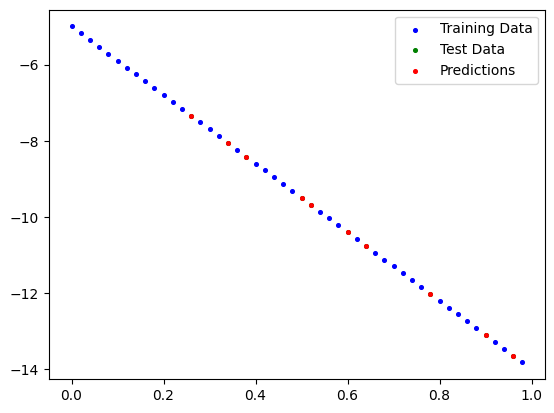

In [ ]:
my_model.eval()
with torch.no_grad():
  y_preds = my_model(X_test)
plot_dataset(X_train, X_test, y_train, y_test, y_preds)

In [ ]:
torch.save(obj=my_model.state_dict(), f="saved_model.pth")

In [ ]:
my_model.load_state_dict(torch.load(f="saved_model.pth"))

<All keys matched successfully>